##### [Task 1](https://en.wikipedia.org/wiki/Differential_calculus) (10 Points)

In [ ]:
""" 
    topic: differential calculus
    
    a)
    approximates the first derivative of a f : R → R for a x_0
    use
        (1)     f'( x_0 ) ≈ f_h'( x_0 ) := ( f( x_0 + h ) - f( x_0 ) ) / h

    apply this to 
        f : x → cos( x ), 
        x_0 = 1 and
        step size = h_i = 2 ^ ( -i ), 
        i ∈ { 0, 1, ···, 15 }

    and calculate the error
        (E)     | f( x_0 ) - f_h( x_0 ) |

    b) 
    instead of (1) 
    use
        (2)     f'( x_0 ) ≈ f_h'( x_0 ) := ( f( x_0 + h ) - f( x_0 - h ) ) / 2h
    
    and repeat the steps of a)

    c)
    plot together ( E_a ) & ( E_b ) regarding h_i with matplotlib
        - pyplot.loglog
        - legend
        - axes 
        - title

    what changes if I halve h_i 

    d) 
    what changes for
        step size = h_i = 2 ^ ( -i ), 
        i ∈ { 0, 1, ···, 30 }
    

"""

In [91]:
from math import sin,cos
import matplotlib.pyplot as plt

def f(x):
    return cos(x)

def df(x):
    return -sin(x)

def approximate(x, h_max, forward):
    approx = list()
    if forward:
        for h in range(h_max + 1):
            h_i = pow(2,-h)
            d = f(x + h_i) - f(x)
            approx.append(d / h_i)
    else:
        for h in range(h_max + 1):
            h_i = pow(2,-h)
            d = f(x + h_i) - f(x - h_i)
            approx.append(d / (2 * h_i))

    return approx

def error(x, h_max, setting):
    errors = dict()
    normal = df(x=x)
    for ind, approx in enumerate(approximate(x=x,h_max=h_max,forward=setting)):
        errors[ind] = abs( normal - approx)
    return errors

def plot(X_0,H_MAX,legend_show=False):
    E_a = error(x=X_0,h_max=H_MAX,setting=True)
    E_b = error(x=X_0,h_max=H_MAX,setting=False)

    x = range(0,H_MAX+1)

    y_a = list(E_a.values())
    y_b = list(E_b.values())

    fig, ax = plt.subplots()

    ax.loglog(x,y_a,
          label="a) f_h'(x_0)",
          color="red",
          linewidth=2, 
          linestyle='--', 
          marker='o', 
          markersize=5, 
          markeredgecolor='black')
    ax.loglog(x,y_b,
          label="b) f_h'(x_0)",
          color="blue",
          linewidth=2, 
          linestyle='-.', 
          marker='s', 
          markersize=5, 
          markeredgecolor='black')

    ax.set_xlabel("Steps",fontsize=12)
    ax.set_ylabel("Error",fontsize=12)
    ax.set_title("Approximation derivative of f: x → cos(x)",fontsize=14, fontstyle='italic')

    ax.grid(True, which='both', linestyle='--', linewidth=0.5)

    if legend_show:
        legend = ax.legend(loc='upper right', shadow=True, fancybox=True, title='Functions')
        legend.get_frame().set_facecolor('lightgray')

    ax.set_facecolor('#f0f0f0')
    where_condition = [y_a[i] >= y_b[i] for i in range(len(x))]
    ax.fill_between(x, y_a, y_b, where=where_condition, facecolor='orange', alpha=0.3)

    plt.show()

In [25]:
# ------ a ------
X_0 = 1
H_MAX = 15
E_a = error(x=X_0,h_max=H_MAX,setting=True)

In [26]:
E_a

{0: 0.11497815760738561,
 1: 0.09765922359297718,
 2: 0.05844878908358786,
 3: 0.03153532774789203,
 4: 0.016331225850926723,
 5: 0.008304585040799006,
 6: 0.004186786762490735,
 7: 0.0021019852880945766,
 8: 0.0010531366295671862,
 9: 0.0005271038101304359,
 10: 0.0002636857161368855,
 11: 0.00013187630301758624,
 12: 6.594651185509726e-05,
 13: 3.297534621737874e-05,
 14: 1.648819633914833e-05,
 15: 8.244230772058714e-06}

In [27]:
# ------ b ------
E_b = error(x=X_0,h_max=H_MAX,setting=False)

In [28]:
E_b

{0: 0.13339756653432533,
 1: 0.034625624585226666,
 2: 0.008737971850792059,
 3: 0.002189619349260985,
 4: 0.0005477256837831401,
 5: 0.0001369514808453598,
 6: 3.423912406730345e-05,
 7: 8.559859386414459e-06,
 8: 2.1399697354151925e-06,
 9: 5.349927485465145e-07,
 10: 1.3374821405953696e-07,
 11: 3.3437030699801085e-08,
 12: 8.359305914140691e-09,
 13: 2.0899315611444536e-09,
 14: 5.224174426388117e-10,
 15: 1.2951573147290674e-10}

In [39]:
[ a > b for a, b in zip(list(E_a.values()), list(E_b.values()))]

[False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True]

In [40]:
[ a < b for a, b in zip(list(E_a.values()), list(E_b.values()))]

[True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False]

In [41]:
[ a == b for a, b in zip(list(E_a.values()), list(E_b.values()))]

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False]

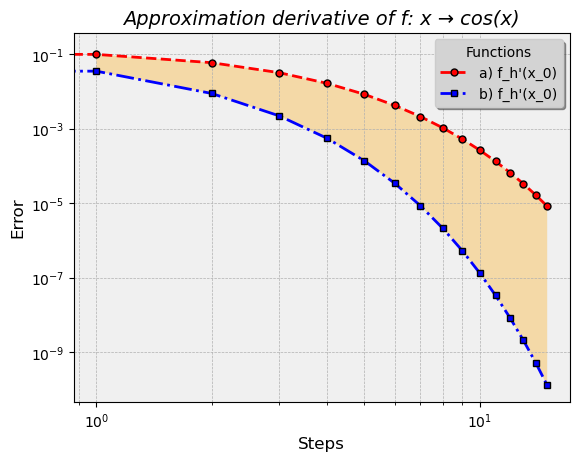

In [92]:
# ------ c ------
plot(X_0=1,H_MAX=15,legend_show=True)

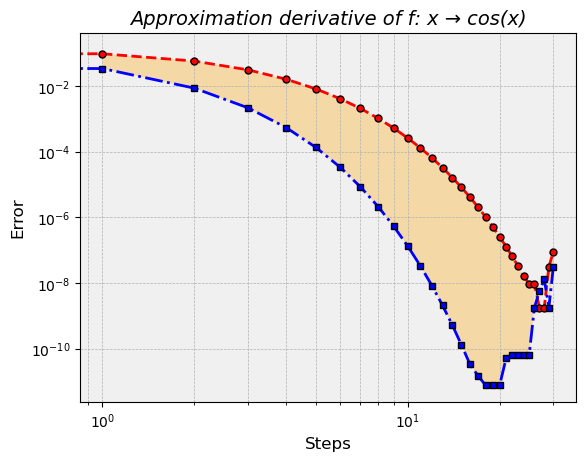

In [93]:
# ------ d ------
plot(X_0=1,H_MAX=30)

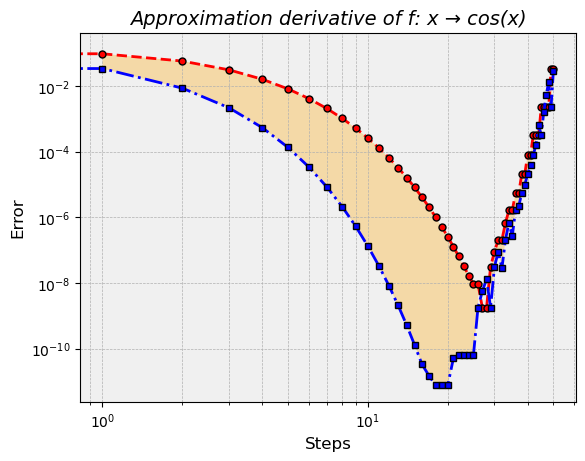

In [94]:
plot(X_0=1,H_MAX=50)

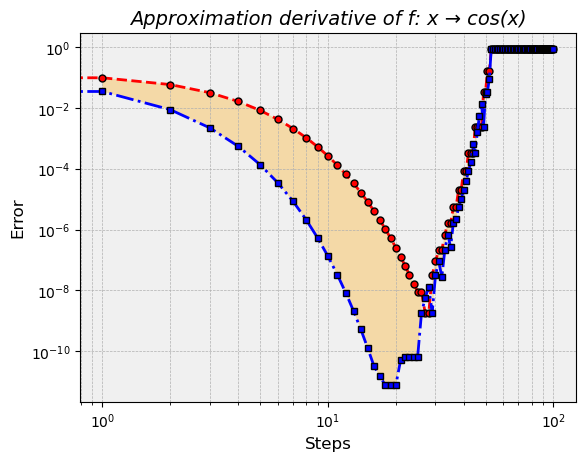

In [95]:
plot(X_0=1,H_MAX=100)

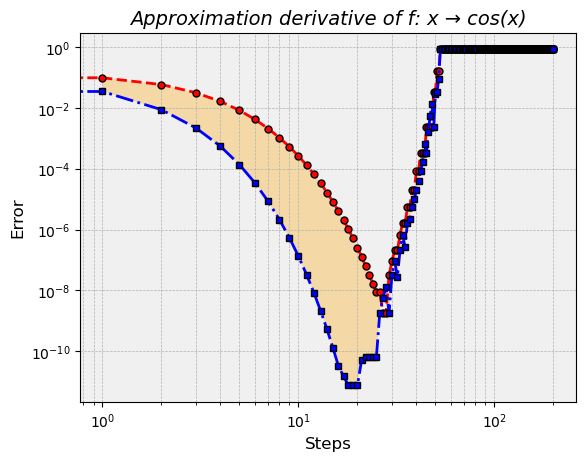

In [96]:
plot(X_0=1,H_MAX=200)

##### [Task 2](https://en.wikipedia.org/wiki/Fibonacci_sequence) (10 Points)

In [ ]:
""" 
    topic: fibonacci sequence

        F_n = F_( n - 1 ) + F_( n - 2) for n ≥ 2
        F_0 = 1, F_1 = 1

    a) 
    implement the fibonacci sequence recursively

    calcultate F_30

    b) 
    implement the fibonacci sequence iteratively

    calcultate F_30

    what changes ? 

    c) 
    measure the running time for a) and b)

    for better transparency return the first 20 results for both

    plot with matplotlib
        - legend
        - axes 
        - titel

    for a)
        - pyplot.semilogy
        - 1 ≤ n ≤ 35

    for b)
        - pyplot.loglog
        - 1 ≤ n ≤ 1000



"""

In [ ]:
# ------ a ------
def Fibonacci_r():
    pass

In [ ]:
# ------ b ------
def Fibonacci_i():
    pass

In [ ]:
# ------ c ------